In [ ]:
import numpy as np
import pandas as pd
from pandas import Series
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
!pip install chardet
import chardet
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
 with open("spam.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]
 data_f= pd.read_csv("spam.csv",encoding=encoding)
 data_f.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
data_f.head().isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True


In [ ]:
data_f.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [ ]:
data_f=data_f.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
data_f.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label= LabelEncoder()
data_f['v1']=label.fit_transform(data_f['v1'])
data_f.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data_f=data_f.rename(columns={'v1': 'Catagory','v2':'message'})
data_f.head()

,Catagory,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
!pip install nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data_f.columns

Index(['Catagory', 'message'], dtype='object')

Checking number of words, characters & sentence

In [ ]:
data_f['word']=data_f['message'].apply(lambda x: len(nltk.word_tokenize(x)))
data_f['character']=data_f['message'].apply(len)
data_f['sentence']=data_f['message'].apply(lambda x: len(nltk.sent_tokenize(x)))
data_f.head()

,Catagory,message,word,character,sentence
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2
1,0,Ok lar... Joking wif u oni...,8,29,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2
3,0,U dun say so early hor... U c already then say...,13,49,1
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1


In [ ]:
data_f.columns

Index(['Catagory', 'message', 'word', 'character', 'sentence'], dtype='object')

In [ ]:
data_f[data_f['Catagory'] == 1][['word', 'character', 'sentence']].describe()

,word,character,sentence
count,747.000000,747.000000,747.000000
mean,27.891566,138.866131,3.021419
std,6.867007,29.183082,1.537580
min,2.000000,13.000000,1.000000
25%,25.000000,132.500000,2.000000
50%,29.000000,149.000000,3.000000
75%,32.000000,157.000000,4.000000
max,46.000000,224.000000,9.000000


In [ ]:
data_f[data_f['Catagory'] == 0][['word', 'character', 'sentence']].describe()

,word,character,sentence
count,4825.000000,4825.000000,4825.000000
mean,17.276269,71.023627,1.837720
std,13.988585,58.016023,1.454388
min,1.000000,2.000000,1.000000
25%,8.000000,33.000000,1.000000
50%,13.000000,52.000000,1.000000
75%,22.000000,92.000000,2.000000
max,220.000000,910.000000,38.000000


In [ ]:
print(sns.palettes.SEABORN_PALETTES)

{'deep': ['#4C72B0', '#DD8452', '#55A868', '#C44E52', '#8172B3', '#937860', '#DA8BC3', '#8C8C8C', '#CCB974', '#64B5CD'], 'deep6': ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD'], 'muted': ['#4878D0', '#EE854A', '#6ACC64', '#D65F5F', '#956CB4', '#8C613C', '#DC7EC0', '#797979', '#D5BB67', '#82C6E2'], 'muted6': ['#4878D0', '#6ACC64', '#D65F5F', '#956CB4', '#D5BB67', '#82C6E2'], 'pastel': ['#A1C9F4', '#FFB482', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#DEBB9B', '#FAB0E4', '#CFCFCF', '#FFFEA3', '#B9F2F0'], 'pastel6': ['#A1C9F4', '#8DE5A1', '#FF9F9B', '#D0BBFF', '#FFFEA3', '#B9F2F0'], 'bright': ['#023EFF', '#FF7C00', '#1AC938', '#E8000B', '#8B2BE2', '#9F4800', '#F14CC1', '#A3A3A3', '#FFC400', '#00D7FF'], 'bright6': ['#023EFF', '#1AC938', '#E8000B', '#8B2BE2', '#FFC400', '#00D7FF'], 'dark': ['#001C7F', '#B1400D', '#12711C', '#8C0800', '#591E71', '#592F0D', '#A23582', '#3C3C3C', '#B8850A', '#006374'], 'dark6': ['#001C7F', '#12711C', '#8C0800', '#591E71', '#B8850A', '#006374'], 'col

2. DATA VISUALIZATION

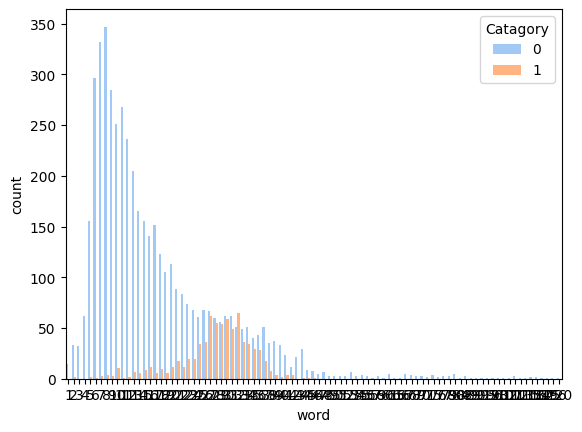

In [ ]:
sns.countplot(x='word',data=data_f,hue='Catagory',palette="pastel",saturation=10)
plt.show()

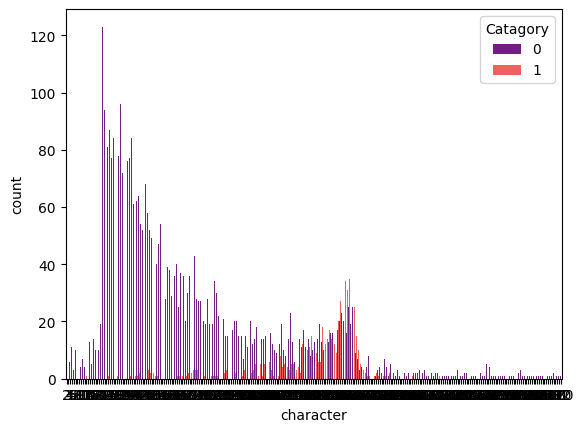

In [ ]:
sns.countplot(x='character',data=data_f,hue='Catagory',palette="magma",saturation=1)
plt.show()

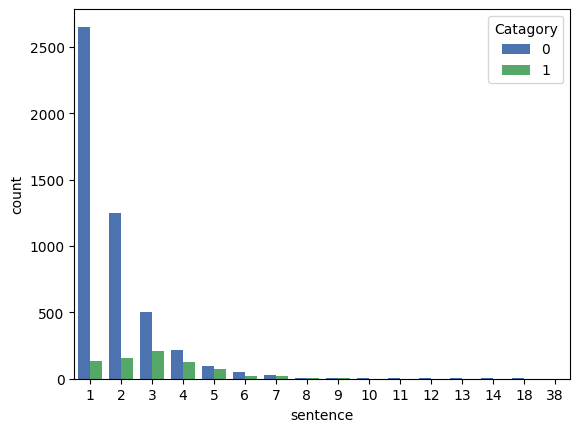

In [ ]:
sns.countplot(x='sentence',data=data_f,hue='Catagory',palette='deep6',saturation=1)
plt.show()

3. CLEANING THE  MESSAGES

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def clean_message(message):
  message= message.lower()
  message= nltk.word_tokenize(message)

  m=[]
  for i in message:
    if i.isalnum():
        m.append(i)
  message=m[:]
  m.clear()
  for i in message:
    if i not in stopwords.words('english') and i not in string.punctuation:
        m.append(i)
  message=m[:]
  m.clear()
  m = []
  for i in message:
      m.append(stemmer.stem(i))


  return " ".join(m)

In [ ]:
data_f['clean_message']=data_f['message'].apply(clean_message)
data_f.head()

,Catagory,message,word,character,sentence,clean_message
0,0,"Go until jurong point, crazy.. Available only ...",24,111,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,8,29,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,37,155,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,13,49,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",15,61,1,nah think goe usf live around though


4. MODEL BUILDING USING NAIVE BAYES


*   Fitting data using countvectorizer



In [ ]:
vec=CountVectorizer()
x=vec.fit_transform(data_f['clean_message']).toarray()
print(x.shape)

(5572, 6708)


In [ ]:
y=data_f['Catagory'].values
print(y)

[0 0 1 ... 0 0 0]




*   Splitting the data



In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=42)



*   Predicting accuracy score,presicion score & confusion matrix

In [ ]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
m=MultinomialNB()
g=GaussianNB()
b=BernoulliNB()

m.fit(x_train,y_train)
multi_nb_pred=m.predict(x_test)
print('ACCURACY SCORE : ',accuracy_score(multi_nb_pred,y_test))
print('precision SCORE : ',precision_score(multi_nb_pred,y_test))
print('recall score :',recall_score(multi_nb_pred,y_test))
print('f1 score :',f1_score(multi_nb_pred,y_test))
print('confusion metrics : ',confusion_matrix(multi_nb_pred,y_test))
m.score(x_test,y_test)

ACCURACY SCORE :  0.9757738896366084
precision SCORE :  0.9163879598662207
recall score : 0.9042904290429042
f1 score : 0.9102990033222591
confusion metrics :  [[1901   25]
 [  29  274]]


0.9757738896366084

Implementing TfidfVectorizer method to improve performance of built model but unfortunately the performance didn't improved much

5. Creating a pandas dataframe to compare performance of different models




In [ ]:
new_data= {
        'Accuracy_score_countvector':[0.9763101220387652,0.8675520459440057, 0.9644651830581479,0.9773869346733668],
        'Accuracy_score_Tfidf':[0.951543431442929,0.8639626704953338, 0.9644651830581479,0.9432878679109835],
        'Precision_metrics_countvector':[ 0.9173333333333333,0.8853333333333333,0.7466666666666667,0.8533333333333334],
        'Precision_metrics_Tfidf':[ 0.64,0.8586666666666667,0.7466666666666667,0.6426666666666667]
 }
new_data_frame=pd.DataFrame(new_data)
new_data_frame=new_data_frame.round(2)
new_data_frame.insert(0,'Model_name',['MultinomialNB','GaussianNB','BernoulliNB','Logistics Regression'])
new_data_frame.head()

,Model_name,Accuracy_score_countvector,Accuracy_score_Tfidf,Precision_metrics_countvector,Precision_metrics_Tfidf
0,MultinomialNB,0.98,0.95,0.92,0.64
1,GaussianNB,0.87,0.86,0.89,0.86
2,BernoulliNB,0.96,0.96,0.75,0.75
3,Logistics Regression,0.98,0.94,0.85,0.64


In [ ]:
new_data_frame['Model_name']=pd.Categorical(new_data_frame['Model_name'])
new_data_frame['Model_name']=new_data_frame['Model_name'].cat.codes
new_data_frame.head()

,Model_name,Accuracy_score_countvector,Accuracy_score_Tfidf,Precision_metrics_countvector,Precision_metrics_Tfidf
0,3,0.98,0.95,0.92,0.64
1,1,0.87,0.86,0.89,0.86
2,0,0.96,0.96,0.75,0.75
3,2,0.98,0.94,0.85,0.64


* Applying heatmap  for better  visualization of scores of different models

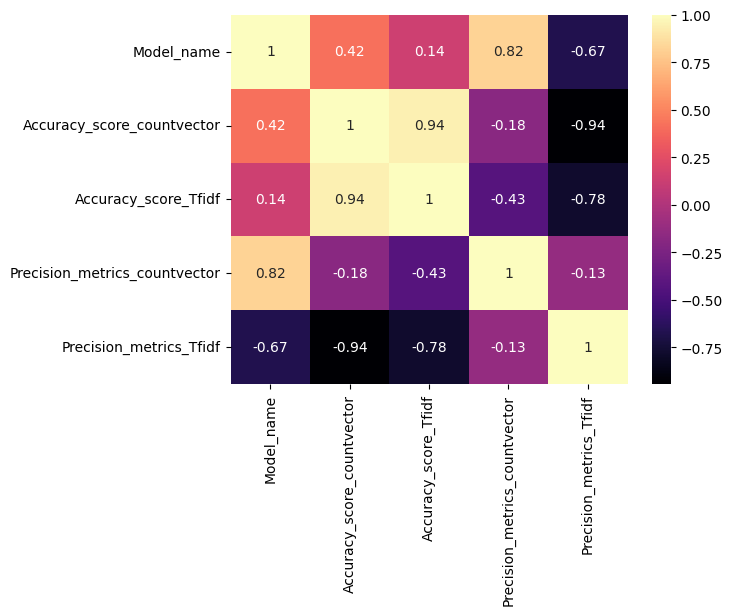

In [ ]:
sns.heatmap(new_data_frame.corr(),annot=True,cmap='magma')
plt.show()

In [ ]:
import pickle
pickle.dump(m,open('./spam_webapp.sav','wb'))
pickle.dump(vec,open('./vectorizer.sav','wb'))